In [1]:
import pandas as pd
# from ta import add_all_ta_features
# from ta.utils import dropna

In [2]:
import pandas as pd
# import pandas_ta as ta

In [50]:
import os

In [44]:
from get_data_from_binance.get_current_data import price_name_now, price_name_jun

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
# Create a DataFrame so 'ta' can be used.
df = pd.DataFrame()

# Help about this, 'ta', extension
#help(df.ta)

# List of all indicators
#df.ta.indicators()

# Help about the log_return indicator
#help(ta.log_return)

In [6]:
df = pd.read_json('datasets_raw/17.01.2021.json')

In [7]:
df.head(10)

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
1,ETHUSDT,1209.05000,253.80000,376.379039,35.98
2,BNBUSDT,41.90970,18.20000,130.273077,-84.96
4,NEOUSDT,22.89900,13.20000,73.477273,-227.94
5,LTCUSDT,141.20000,49.96000,182.626101,-31.94
6,QTUMUSDT,2.97000,1.92400,54.365904,-343.22
7,ADAUSDT,0.36565,0.09039,304.524837,20.87
8,XRPUSDT,0.27344,0.21470,27.359106,-780.73
9,EOSUSDT,2.72120,2.89390,-5.967725,4137.70
11,IOTAUSDT,0.41200,0.25850,59.381044,-305.78
12,XLMUSDT,0.29750,0.08631,244.687753,1.52


In [8]:
print('Dataframe shape is: ', df.shape)

Dataframe shape is:  (236, 5)


In [9]:
df.columns

Index(['symbol', 'price2021-01-17', 'price2020-06-01', 'price_change',
       'compare_to_btc'],
      dtype='object')

In [10]:
#df.info

In [11]:
df.describe()

,price2021-01-17,price2020-06-01,price_change,compare_to_btc
count,236.000000,236.000000,236.000000,236.000000
mean,181.640929,102.512904,44.229550,3689.607288
std,2201.425747,807.218797,150.650127,25112.996954
min,0.000089,0.000092,-99.958865,-12269.210000
25%,0.048008,0.082483,-56.299908,-144.277500
50%,0.526750,1.077650,-0.319520,341.535000
75%,5.287000,11.167750,89.310740,560.777500
max,33695.690000,9865.000000,853.017578,254953.850000


In [12]:
df.loc[4, 'price2021-01-17']

22.899

In [13]:
df.reset_index(inplace = True)

In [14]:
df.drop('index', axis=1).head(10)

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1209.05000,253.80000,376.379039,35.98
1,BNBUSDT,41.90970,18.20000,130.273077,-84.96
2,NEOUSDT,22.89900,13.20000,73.477273,-227.94
3,LTCUSDT,141.20000,49.96000,182.626101,-31.94
4,QTUMUSDT,2.97000,1.92400,54.365904,-343.22
5,ADAUSDT,0.36565,0.09039,304.524837,20.87
6,XRPUSDT,0.27344,0.21470,27.359106,-780.73
7,EOSUSDT,2.72120,2.89390,-5.967725,4137.70
8,IOTAUSDT,0.41200,0.25850,59.381044,-305.78
9,XLMUSDT,0.29750,0.08631,244.687753,1.52


In [15]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='compare_to_btc', ylabel='price_change'>

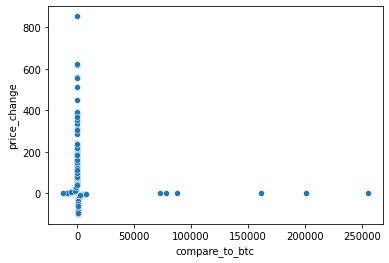

In [16]:
sns.scatterplot(y = df.price_change, x = df.compare_to_btc)

In [17]:
df[df['compare_to_btc'] > 50000]

,index,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
10,13,ONTUSDT,0.6340,0.6346,-0.094548,254953.85
16,20,PAXUSDT,1.0001,1.0013,-0.119844,201159.85
17,23,USDCUSDT,0.9999,1.0030,-0.309073,78061.76
21,27,USDSUSDT,0.9968,1.0001,-0.329967,73125.05
66,73,BUSDUSDT,1.0002,1.0017,-0.149745,161012.14
216,233,XEMUSDT,0.2166,0.2172,-0.276243,87327.00


In [18]:
df1 = df.loc[(df['price_change']>0) & (df['compare_to_btc']<50000)]

In [19]:
type(df1)

pandas.core.frame.DataFrame

In [20]:
df1.reset_index(inplace=True)

In [21]:
df1.head(5)

,level_0,index,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
0,0,1,ETHUSDT,1209.0500,253.800,376.379039,35.98
1,1,2,BNBUSDT,41.9097,18.200,130.273077,-84.96
2,2,4,NEOUSDT,22.8990,13.200,73.477273,-227.94
3,3,5,LTCUSDT,141.2000,49.960,182.626101,-31.94
4,4,6,QTUMUSDT,2.9700,1.924,54.365904,-343.22


In [22]:
df1.drop(['level_0', 'index'], axis=1, inplace=True)

/home/uru/anaconda3/envs/trading/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='price_change', ylabel='price_change'>

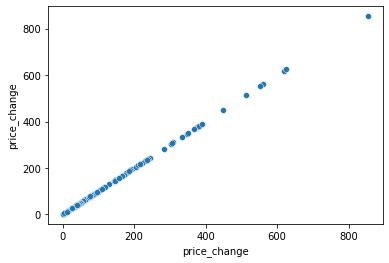

In [23]:
sns.scatterplot(y = df1.price_change, x = df1.price_change)

In [24]:
dfu350 = df1.loc[df1['price_change']<350]

In [25]:
dfa350 = df1.loc[df1['price_change']>350]

## Currencies that increased less than 4.5 times

In [26]:
dfu350 = dfu350.drop(['level_0', 'index'], axis=1)

KeyError: "['level_0' 'index'] not found in axis"

In [45]:
dfu350.reset_index(inplace=True)


In [29]:
dfu350.describe()

,index,price2021-01-17,price2020-06-01,price_change,compare_to_btc
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,56.079208,33.229860,17.450818,108.324857,-1026.878317
std,33.242047,155.887670,88.512066,91.670143,2336.083908
min,1.000000,0.000300,0.000153,1.948052,-12269.210000
25%,27.000000,0.025942,0.015000,34.204386,-604.470000
50%,55.000000,0.425100,0.248000,77.788147,-209.760000
75%,86.000000,13.732200,5.060000,178.349482,-35.100000
max,112.000000,1477.330000,845.000000,347.677817,30.690000


In [30]:
dfu = dfu350[dfu350['symbol'].str.contains("UP")]
dfu
indlist = [80, 85, 93, 96, 99, 100]

In [31]:
dfuu = dfu350[~dfu350['index'].isin(indlist)]

In [46]:
dfuu.head(5)

,level_0,index,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc,btc
0,0,1,BNBUSDT,41.90970,18.20000,130.273077,-84.96,0.540645
1,1,2,NEOUSDT,22.89900,13.20000,73.477273,-227.94,0.304937
2,2,3,LTCUSDT,141.20000,49.96000,182.626101,-31.94,0.757915
3,3,4,QTUMUSDT,2.97000,1.92400,54.365904,-343.22,0.225623
4,4,5,ADAUSDT,0.36565,0.09039,304.524837,20.87,1.263806


<AxesSubplot:xlabel='compare_to_btc', ylabel='price_change'>

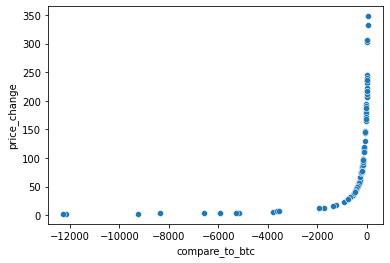

In [33]:
sns.scatterplot(y = dfuu.price_change, x = dfuu.compare_to_btc)

In [47]:
dfuu['btc'] = dfuu['price_change']/240.958574
dfuu.head(5)

<ipython-input-47-1e1c89a2ed7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfuu['btc'] = dfuu['price_change']/240.958574


,level_0,index,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc,btc
0,0,1,BNBUSDT,41.90970,18.20000,130.273077,-84.96,0.540645
1,1,2,NEOUSDT,22.89900,13.20000,73.477273,-227.94,0.304937
2,2,3,LTCUSDT,141.20000,49.96000,182.626101,-31.94,0.757915
3,3,4,QTUMUSDT,2.97000,1.92400,54.365904,-343.22,0.225623
4,4,5,ADAUSDT,0.36565,0.09039,304.524837,20.87,1.263806


In [53]:
dfuu.to_csv(f'datasets_cleaned/{price_name_now}_under350.csv')

<AxesSubplot:xlabel='btc', ylabel='btc'>

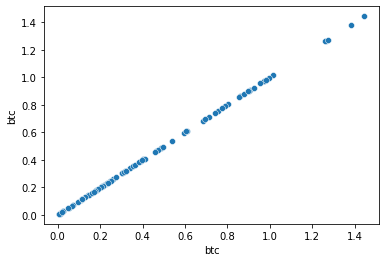

In [36]:
sns.scatterplot(y = dfuu.btc, x = dfuu.btc)

/home/uru/anaconda3/envs/trading/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='btc'>

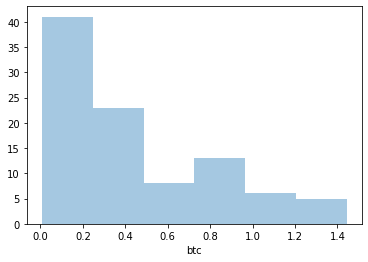

In [37]:
sns.distplot(dfuu['btc'], kde=False)

<AxesSubplot:xlabel='price_change'>

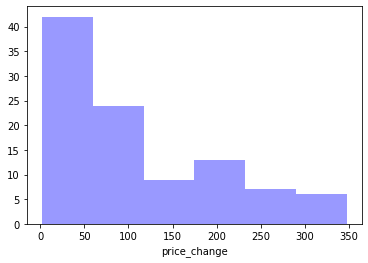

In [38]:
sns.distplot(dfu350.price_change, kde=False, color='b')

## Currencies that grew over 4.5 times

In [39]:
dfa350.describe()

,price2021-01-17,price2020-06-01,price_change,compare_to_btc
count,12.000000,12.000000,12.000000,12.000000
mean,2926.646480,623.466128,503.484173,48.683333
std,9695.804786,2072.015907,149.100294,13.199801
min,0.019710,0.003016,350.941730,31.340000
25%,0.582140,0.091625,379.897130,36.572500
50%,8.093400,1.578400,481.983891,49.785000
75%,86.357000,10.552500,575.733389,58.070000
max,33695.690000,7199.000000,853.017578,71.750000


In [40]:
dfa350.drop(labels=[76,85],inplace=True)

/home/uru/anaconda3/envs/trading/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
dfa350.to_csv(f'datasets_cleaned/{price_name_now}_above350.csv')

In [42]:
## those below 350
dfu350 = dfuu
dfu350.head(10)

,index,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc,btc
0,1,BNBUSDT,41.90970,18.20000,130.273077,-84.96,0.540645
1,2,NEOUSDT,22.89900,13.20000,73.477273,-227.94,0.304937
2,3,LTCUSDT,141.20000,49.96000,182.626101,-31.94,0.757915
3,4,QTUMUSDT,2.97000,1.92400,54.365904,-343.22,0.225623
4,5,ADAUSDT,0.36565,0.09039,304.524837,20.87,1.263806
5,6,XRPUSDT,0.27344,0.21470,27.359106,-780.73,0.113543
6,7,IOTAUSDT,0.41200,0.25850,59.381044,-305.78,0.246437
7,8,XLMUSDT,0.29750,0.08631,244.687753,1.52,1.015476
8,9,TRXUSDT,0.02974,0.01824,63.048246,-282.18,0.261656
9,10,ETCUSDT,7.58280,7.31950,3.597240,-6598.43,0.014929


In [43]:
## those above 350
dfa350

,symbol,price2021-01-17,price2020-06-01,price_change,compare_to_btc
0,ETHUSDT,1209.05000,253.800000,376.379039,35.98
14,WAVESUSDT,6.55500,1.191800,450.008391,46.45
29,THETAUSDT,2.01700,0.305000,561.311475,57.07
39,ERDUSDT,0.01971,0.003016,553.514589,56.47
54,CVCUSDT,0.15019,0.031220,381.069827,36.77
56,BANDUSDT,9.63180,1.965000,390.167939,38.24
57,RENUSDT,0.60475,0.098500,513.959391,53.12
78,LENDUSDT,0.51431,0.071000,624.380282,61.41
84,SNXUSDT,15.32300,3.398000,350.941730,31.34
92,YFIUSDT,33695.69000,7199.000000,368.060703,34.53
